In [7]:
import pyarrow.parquet as pq
import matplotlib.pyplot as plt
import numpy as np
from copy import deepcopy
# leer la base parquet
trips = pq.read_table('data\yellow_tripdata_2022-01.parquet')
# transformar a dataframe de pandas
trips = trips.to_pandas()

trips_by_loc = trips[["PULocationID"]].groupby("PULocationID").size()
trips_by_loc.sort_values()
trips[(trips["PULocationID"] == 237) & (trips["passenger_count"] >= 1)]
trips["trip_distance"].sort_values()
viajes_limpios = trips[(trips["passenger_count"] >= 1) & (trips["trip_distance"] > 0) & (trips["tpep_pickup_datetime"].dt.month == 1)]
len(viajes_limpios)
trips_by_loc = viajes_limpios[["PULocationID"]].groupby("PULocationID").size()

# CODIGO DESAFIO


<>:6: SyntaxWarning: invalid escape sequence '\y'
<>:6: SyntaxWarning: invalid escape sequence '\y'
C:\Users\User\AppData\Local\Temp\ipykernel_6884\946348359.py:6: SyntaxWarning: invalid escape sequence '\y'
  trips = pq.read_table('data\yellow_tripdata_2022-01.parquet')


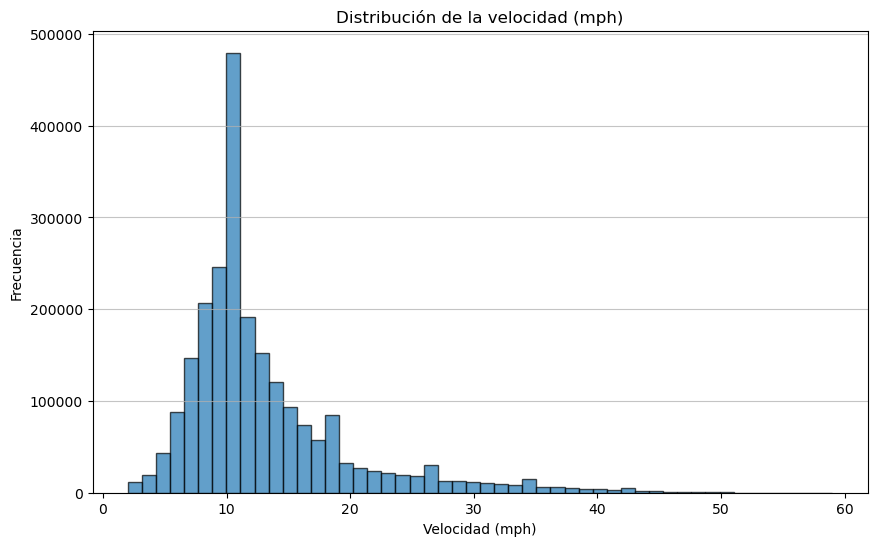

199.0


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,duration_hours,speed_mph
929556,1,2022-01-13 21:10:33,2022-01-13 21:11:11,1.0,2.1,1.0,Y,229,229,2,...,3.0,0.5,0.0,0.0,0.3,6.3,2.5,0.0,0.010556,199.0
1890920,1,2022-01-25 16:55:18,2022-01-25 16:55:47,1.0,1.6,1.0,N,145,145,2,...,1.0,0.5,0.0,0.0,0.3,4.3,0.0,0.0,0.008056,199.0


In [8]:

velocidad_df = deepcopy(viajes_limpios)

velocidad_df['duration_hours'] = (velocidad_df['tpep_dropoff_datetime'] - velocidad_df['tpep_pickup_datetime']).dt.total_seconds() / 3600
velocidad_df = velocidad_df[(velocidad_df['duration_hours'] > 0) & (velocidad_df['duration_hours'] < 10)] # Limpiamos a tiempo con sentido
velocidad_df['speed_mph'] = round(velocidad_df['trip_distance'] / velocidad_df['duration_hours']) # Redondeamos para sacar una idea
velocidad_df['speed_mph'].sort_values() # Encontramos que existen valore negativos e infinitos (division por 0)

# Eliminamos estso valores
speed_limpia = velocidad_df[np.isfinite(velocidad_df['speed_mph'])]['speed_mph']
# De los valores finitos, seleccionamos solo los que son mayores a 0
speed_limpia = speed_limpia[speed_limpia > 1]
speed_limpia = speed_limpia[speed_limpia < 200]
#dejamos un maximo "razonable" (320 km/h)

velocidad_filtrada = velocidad_df[(velocidad_df['speed_mph'] > 1) & (velocidad_df['speed_mph'] < 60)]['speed_mph']
#60 mph = 96 km/h

plt.figure(figsize=(10, 6))
plt.hist(velocidad_filtrada, bins=50, edgecolor='black', alpha=0.7)
plt.title('Distribución de la velocidad (mph)')
plt.xlabel('Velocidad (mph)')
plt.ylabel('Frecuencia')
plt.grid(axis='y', alpha=0.75)
plt.show()

max_speed = speed_limpia.max()
print(max_speed) # Existe un taxi que tiene viajes a esa velocidad
velocidad_df[velocidad_df['speed_mph'] == max_speed] # Podemos ver que paso y obtener el id del taxi



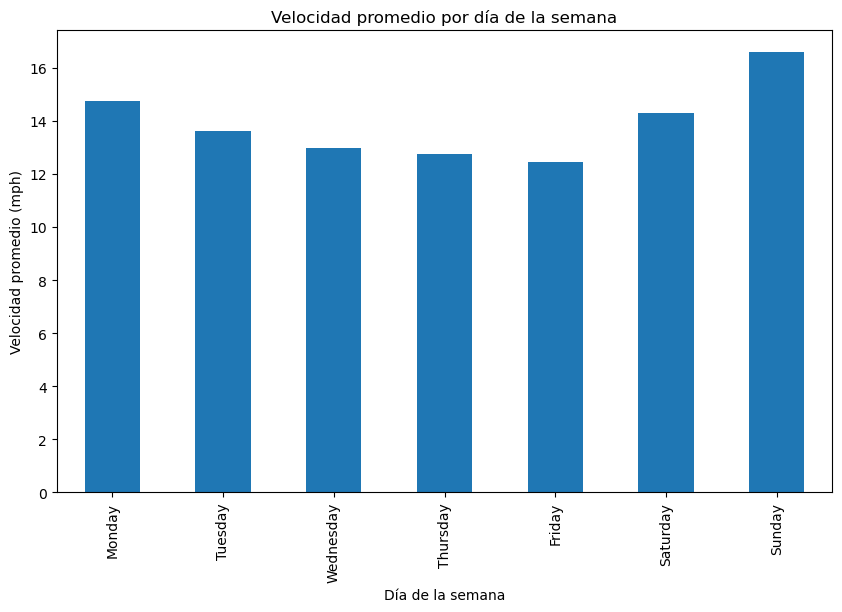

In [ ]:
velocidad_df['weekday'] = velocidad_df['tpep_pickup_datetime'].dt.day_name()
velocidad_por_dia = velocidad_df.groupby('weekday')['speed_mph'].mean().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])

# Calculamos y graficamos velocidad promedio por dia de semana

plt.figure(figsize=(10, 6))
velocidad_por_dia.plot(kind='bar')
plt.title('Velocidad promedio por día de la semana')
plt.ylabel('Velocidad promedio (mph)')
plt.xlabel('Día de la semana')
plt.show()